In [84]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt

import numpy
import pandas

u_file = '/Users/damienirving/Downloads/Data/ua_ERAInterim_500hPa_2006-030day-runmean_native.nc'
v_file = '/Users/damienirving/Downloads/Data/va_ERAInterim_500hPa_2006-030day-runmean_native.nc'
thetao_file ='/Users/damienirving/Downloads/Data/thetao_Omon_ACCESS1-3_historical_r1i1p1_185001-185412.nc'

In [85]:
print iris.__version__

1.8.0


In [86]:
date = iris.time.PartialDateTime(year=2006, month=5, day=22)
time_constraint = iris.Constraint(time=date)
level_constraint = iris.Constraint(lev=5)

with iris.FUTURE.context(cell_datetime_objects=True):
    u_cube = iris.load_cube(u_file, 'eastward_wind' & time_constraint)  
    v_cube = iris.load_cube(v_file, 'northward_wind' & time_constraint) 
    #thetao_cube = iris.load_cube(thetao_file, 'sea_water_potential_temperature')

u_cube = u_cube.intersection(longitude=(-180, 180, True, True))
v_cube = v_cube.intersection(longitude=(-180, 180, True, True))
# Results didn't actually change for 0 360 vs -180 180

In [87]:
#print thetao_cube

In [88]:
#thetao_cube.coords()

In [89]:
%matplotlib inline

def plot_winds(u, v):
    """Plot the wind."""

    proj = ccrs.PlateCarree(central_longitude=-180.0)
    fig = plt.figure(figsize=(12, 5))

    ax = plt.subplot(121, projection=proj)
    qplt.contourf(u, 15)
    plt.gca().coastlines()

    ax = plt.subplot(122, projection=proj)
    qplt.contourf(v, 15)
    plt.gca().coastlines()

    iplt.show()

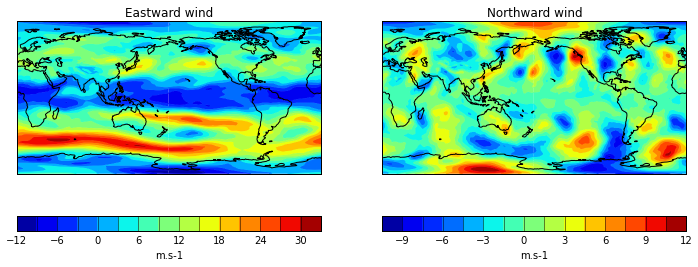

In [90]:
plot_winds(u_cube, v_cube)

## Rotating the wind

In [91]:
rotated_cs = iris.coord_systems.RotatedGeogCS(20, 260)
urot_cube, vrot_cube = iris.analysis.cartography.rotate_winds(u_cube, v_cube, rotated_cs)

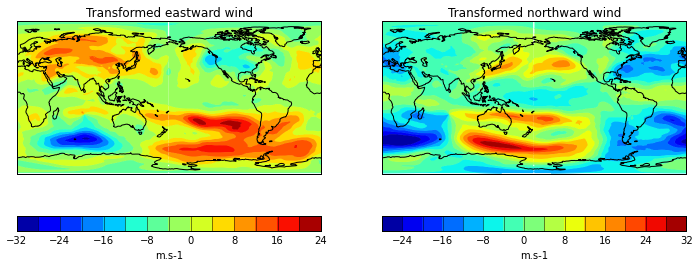

In [92]:
plot_winds(urot_cube, vrot_cube)

In [93]:
print vrot_cube

transformed_northward_wind / (m s**-1) (latitude: 241; longitude: 480)
     Dimension coordinates:
          latitude                              x               -
          longitude                             -               x
     Auxiliary coordinates:
          projection_x_coordinate               x               x
          projection_y_coordinate               x               x
     Scalar coordinates:
          time: 2006-05-22 06:00:00
     Attributes:
          CDI: Climate Data Interface version 1.5.3 (http://code.zmaw.de/projects/cdi...
          CDO: Climate Data Operators version 1.5.3 (http://code.zmaw.de/projects/cdo...
          Conventions: CF-1.0
          history: Mon Jun 15 13:04:23 2015: ncatted -O -a axis,time,c,c,T va_ERAInterim_500hPa_2006-030day-runmean_native.nc
Mon...
          level: 500hPa
          nco_openmp_thread_number: 1


In [94]:
#vrot_cube.data.flatten()
#vrot_cube.aux_coords

In [95]:
vrot_cube.coords()

[DimCoord(array([-90.  , -89.25, -88.5 , -87.75, -87.  , -86.25, -85.5 , -84.75,
        -84.  , -83.25, -82.5 , -81.75, -81.  , -80.25, -79.5 , -78.75,
        -78.  , -77.25, -76.5 , -75.75, -75.  , -74.25, -73.5 , -72.75,
        -72.  , -71.25, -70.5 , -69.75, -69.  , -68.25, -67.5 , -66.75,
        -66.  , -65.25, -64.5 , -63.75, -63.  , -62.25, -61.5 , -60.75,
        -60.  , -59.25, -58.5 , -57.75, -57.  , -56.25, -55.5 , -54.75,
        -54.  , -53.25, -52.5 , -51.75, -51.  , -50.25, -49.5 , -48.75,
        -48.  , -47.25, -46.5 , -45.75, -45.  , -44.25, -43.5 , -42.75,
        -42.  , -41.25, -40.5 , -39.75, -39.  , -38.25, -37.5 , -36.75,
        -36.  , -35.25, -34.5 , -33.75, -33.  , -32.25, -31.5 , -30.75,
        -30.  , -29.25, -28.5 , -27.75, -27.  , -26.25, -25.5 , -24.75,
        -24.  , -23.25, -22.5 , -21.75, -21.  , -20.25, -19.5 , -18.75,
        -18.  , -17.25, -16.5 , -15.75, -15.  , -14.25, -13.5 , -12.75,
        -12.  , -11.25, -10.5 ,  -9.75,  -9.  ,  -8.25,

In [96]:
x_values = vrot_cube.coord('projection_x_coordinate').points
y_values = vrot_cube.coord('projection_y_coordinate').points
lats = vrot_cube.coord('latitude').points
lons = vrot_cube.coord('longitude').points

In [97]:
print lats[10]
print lons[65]

-82.5
-131.25


In [98]:
print 'new lon:', x_values[10, 65]
print 'new lat:', y_values[10, 65]

new lon: 176.006046482
new lat: -13.5465521473


In [99]:
print x_values.max()
print x_values.min()
print y_values.min()
print y_values.max()

180.0
-180.0
-89.6570701505
89.6570701505


In [100]:
x_values[0:10]

array([[ 180.        ,  180.        ,  180.        , ...,  180.        ,
         180.        ,  180.        ],
       [ 179.21464622,  179.21657392,  179.21863548, ...,  179.20966969,
         179.21119379,  179.21285273],
       [ 178.43061559,  178.43456208,  178.43877521, ...,  178.4203834 ,
         178.42352555,  178.4269365 ],
       ..., 
       [ 174.5310225 ,  174.54635543,  174.56259877, ...,  174.49052153,
         174.50310214,  174.51660358],
       [ 173.75534207,  173.77319527,  173.79208286, ...,  173.70803114,
         173.72275592,  173.73852757],
       [ 172.98111094,  173.00156001,  173.02316566, ...,  172.92675272,
         172.9437025 ,  172.96182348]])

In [101]:
lon_mesh, lat_mesh = numpy.meshgrid(lons, lats)

lat_flat = lat_mesh.flatten()
lon_flat = lon_mesh.flatten()

x_flat = x_values.flatten()
y_flat = y_values.flatten()

In [102]:
len(lat_flat)

115680

In [103]:
len(x_flat)

115680

In [104]:
def convert_point_1d(orig_lat, orig_lon):
    
    lat_indexes = numpy.where(lat_flat == orig_lat)
    lon_indexes = numpy.where(lon_flat == orig_lon)

    index = numpy.intersect1d(lat_indexes[0], lon_indexes[0])
    assert len(index) == 1
    
    print 'rotated lat (1D method):', y_flat[index]
    print 'rotated lon (1D method):', x_flat[index]
    
def convert_point_2d(orig_lat, orig_lon):
    
    lat_index = numpy.where(lats == orig_lat)
    lon_index = numpy.where(lons == orig_lon)
    
    print 'rotated lat (2D method):', y_values[lat_index, lon_index]
    print 'rotated lon (2D method):', x_values[lat_index, lon_index]

In [105]:
test_lat = 82.5
test_lon = 130.5

convert_point_1d(test_lat, test_lon)
convert_point_2d(test_lat, test_lon)


rotated lat (1D method): [ 15.13393305]
rotated lon (1D method): [ 5.98889898]
rotated lat (2D method): [[ 15.13393305]]
rotated lon (2D method): [[ 5.98889898]]


## Sorting the axis values

In [118]:
new_lats = pandas.Series(y_flat, name='latitude')
new_lons = pandas.Series(x_flat, name='longitude')
data = pandas.Series(vrot_cube.data.flatten(), name='data')

df = pandas.concat([new_lats, new_lons, data], axis=1)
print df

        latitude     longitude  data
0            -20  1.800000e+02   NaN
1            -20  1.800000e+02   NaN
2            -20  1.800000e+02   NaN
3            -20  1.800000e+02   NaN
4            -20  1.800000e+02   NaN
5            -20  1.800000e+02   NaN
6            -20  1.800000e+02   NaN
7            -20  1.800000e+02   NaN
8            -20  1.800000e+02   NaN
9            -20  1.800000e+02   NaN
10           -20  1.800000e+02   NaN
11           -20  1.800000e+02   NaN
12           -20  1.800000e+02   NaN
13           -20  1.800000e+02   NaN
14           -20  1.800000e+02   NaN
15           -20  1.800000e+02   NaN
16           -20  1.800000e+02   NaN
17           -20  1.800000e+02   NaN
18           -20  1.800000e+02   NaN
19           -20  1.800000e+02   NaN
20           -20  1.800000e+02   NaN
21           -20  1.800000e+02   NaN
22           -20  1.800000e+02   NaN
23           -20  1.800000e+02   NaN
24           -20  1.800000e+02   NaN
25           -20  1.800000e+02   NaN
2

In [120]:
df.sort(['latitude', 'longitude'], ascending=[True, False])

,latitude,longitude,data
44987,-89.657070,136.846543,2.743234
44986,-89.468113,-118.121730,-8.475497
45467,-89.447404,25.243458,6.457808
45466,-89.313377,-43.349034,-2.240079
44988,-89.028346,105.081140,6.707127
44507,-88.972950,166.864226,-1.488541
45468,-88.934260,62.190156,8.302773
44506,-88.895767,-154.991748,-6.622445
44985,-88.799993,-102.239171,-8.131557
45947,-88.727947,10.726289,4.974377


## Creating a cube from scratch

The documentation is [here](http://scitools.org.uk/iris/docs/latest/iris/iris/cube.html)

In [107]:
>>> from iris.coords import DimCoord
>>> from iris.cube import Cube
>>> latitude = DimCoord(np.linspace(-90, 90, 4),
...                     standard_name='latitude',
...                     units='degrees')
>>> longitude = DimCoord(np.linspace(45, 360, 8),
...                      standard_name='longitude',
...                      units='degrees')
>>> cube = Cube(np.zeros((4, 8), np.float32),
...             dim_coords_and_dims=[(latitude, 0),
...                                  (longitude, 1)])

NameError: name 'np' is not defined